# Metode Numerik untuk Ordinary Differential Equation (ODE)

Pada parktikum ini Anda akan mempelajari cara penyelesaian numerik persamaan ODE dengan implementasi python. Metode yang akan dipelajari meliputi,
1. metode forward Euler
2. metode Euler mid-point
3. metode Heun / Runge-Kutta orde 2 (RK2)
4. metode RK4

Pada praktikum ini juga akan diberikan contoh kasus geofisika yaitu ray tracing.

## 01 Contoh implementasi metode Euler

Metode Euler sebenarnya diturunkan dari ekspansi Taylor (dinyatakan dalam notasi diskrit)
\begin{equation}
T_{i+1}=T_i+f(t_i,T_i)\Delta t+...
\end{equation}
dengan $f(t_i,T_i)=\frac{dT}{dt}$.

Contoh:
Perhatikan persamaan berikut,
\begin{equation}
\frac{dT}{dt}=tT
\end{equation}
Hitunglah nilai $T$ pada rentang $t=0$ sd $t=2.5$ dengan interval $\Delta t=0.25$ dan gunakan $T(t=0)=5$!

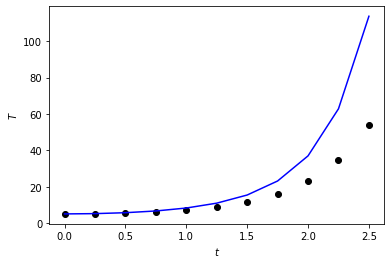

In [26]:
#python code for forward Euler

import numpy as np
from sympy import *
import matplotlib.pyplot as plt

t0=0
t1=2.5
dt=0.25
N=int((t1-t0)/dt+1)
tt=np.arange(N,dtype=float)*dt
#metode euler
TTe=np.zeros(N)

#solusi analitik (lihat diktat kuliah persamaan 6c)
Ta = 5*np.exp(0.5*tt*tt)

#assign T(0)=5
TTe[0]=5

ff, ts,Ts = symbols("ff ts Ts")
ff = ts*Ts

for ii in range(1,N):
    fi = ff.subs([(ts,tt[ii-1]),(Ts,TTe[ii-1])])
    TTe[ii] = TTe[ii-1] + fi*dt

#plot solusi numerik
plt.plot(tt,TTe,'ko')

#plot solusi analitik
plt.plot(tt,Ta,'b')

plt.xlabel(r"$t$")
plt.ylabel(r"$T$")
plt.show()

Hitung truncation error pada masing-masing posisi grid dengan formula,
\begin{equation}
error=analitik-numerik
\end{equation}

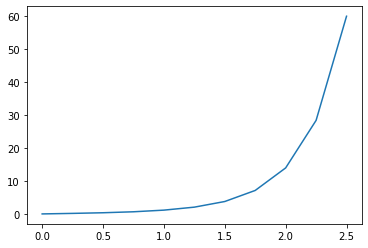

In [25]:
#error euler

ee=Ta-TTe

plt.plot(tt,ee)
plt.show()

Error meningkat ketika t membesar. Hal ini terjadi karena error pada grid $t_i$ akan terbawa atau berpropagasi dan terakumulasi ke perhitungan pada posisi berikutnya

## 02 Euler mid-point

Pada metode ini, gradient $f$ yang digunakan merupakan nilai $f$ pada $t_{i+0.5}=t_i+0.5\Delta t$, sehingga
\begin{equation}
T_{i+1}=T_i+f(t_{i+0.5},T_{i+0.5})\Delta t+...
\end{equation}
dengan $T_{i+0.5}=T_i+f(t_{i},T_i)0.5\Delta t$.


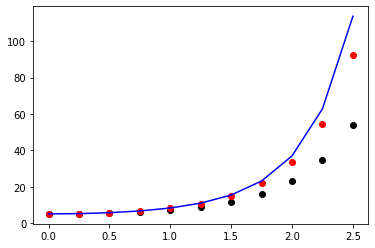

In [31]:
#mid-point Euler

#metode mid-point Euler
TTem=np.zeros(N)
#initial value
TTem[0]=5

for ii in range(1,N):
    fi = ff.subs([(ts,tt[ii-1]),(Ts,TTe[ii-1])])
    ymid = TTem[ii-1] + fi*0.5*dt
    fi_mid = ff.subs([(ts, tt[ii-1]+0.5*dt),(Ts, ymid)])
    TTem[ii] = TTem[ii-1] + fi_mid*dt
    

#plot solusi numerik
#forward Euler
plt.plot(tt,TTe,'ko')
#mid-point Euler
plt.plot(tt,TTem,'ro')

#plot solusi analitik
plt.plot(tt,Ta,'b')
plt.show()

which one is better? (forward Euler or mid-point)

## 03 Metode Heun atau Runge-Kutta orde 2 (RK2)


